In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df=pd.read_csv('homeprices_banglore.csv')
df.head(5)
df.shape

(20, 3)

In [8]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [15]:
df.shape[0]

20

In [37]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y.shape

(20, 1)

## Batch Gradient Descent

In [21]:
def batch_gd(X,y_true,epochs,learning_rate=0.01):
    features=X.shape[1]
    w=np.ones(shape=(features))
    b=0
    total_samples=X.shape[0]
    
    cost_lst=[]
    epoch_lst=[]
    for i in range(epochs):
        y_predicted= np.dot(w,X.T) +b
        
        w_grad= -(2/total_samples)* np.dot(X.T,y_true-y_predicted)
        b_grad= -(2/total_samples)* np.sum(y_true-y_predicted)
        
        w=w - learning_rate*w_grad
        b=b - learning_rate*b_grad
        
        cost= np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_lst.append(cost)
            epoch_lst.append(i)
            
    return w,b,cost,cost_lst,epoch_lst

In [39]:
w,b,cost,cost_lst,epoch_lst=batch_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

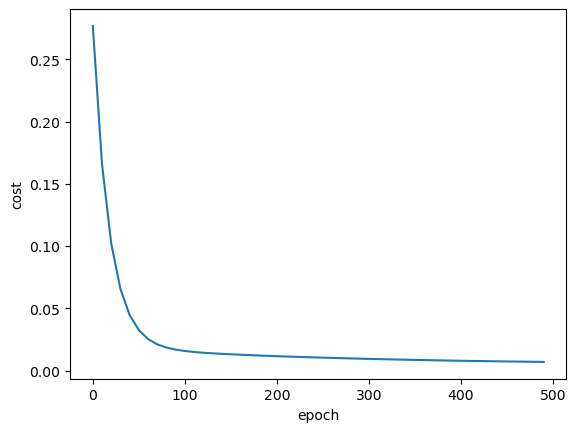

In [40]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_lst,cost_lst)

In [55]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    scaled_price= w[0]*scaled_x[0]+ w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])
    

In [56]:
predict(2600,4,w,b)

/home/ettexham/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

## Stochastic Gradient Descent

In [61]:
import random

In [70]:
def sgd(X,y_true,epochs,learning_rate=0.01):
    features=X.shape[1]
    w=np.ones(shape=(features))
    b=0
    total_samples=X.shape[0]
    
    cost_lst=[]
    epoch_lst=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted= np.dot(w,sample_x.T) +b
        
        w_grad= -(2/total_samples)* np.dot(sample_x.T,(sample_y-y_predicted))
        b_grad= -(2/total_samples)* (sample_y-y_predicted)
        
        w=w - learning_rate*w_grad
        b=b - learning_rate*b_grad
        
        cost= (np.square(sample_y-y_predicted))
        
        if i%100==0:
            cost_lst.append(cost)
            epoch_lst.append(i)
            
    return w,b,cost,cost_lst,epoch_lst

In [72]:
w_sgd,b_sgd,cost_sgd,cost_lst_sgd,epoch_lst_sgd=sgd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70486838, 0.671276  ]), -0.22607703619375516, 0.05121320148391884)

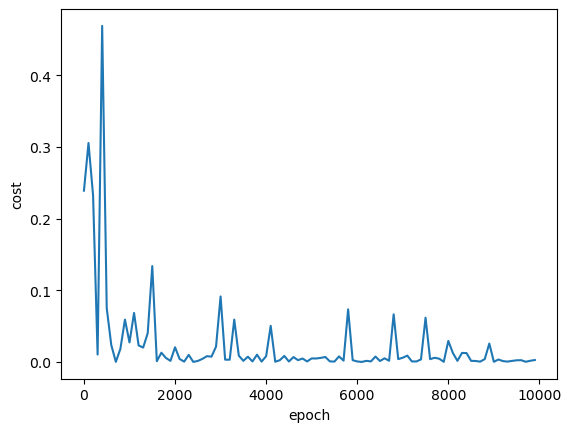

In [73]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_lst_sgd,cost_lst_sgd)

## Mini Batch Gradient Descent

In [75]:
import random

In [79]:
def mini_batch_gd(X,y_true,epochs,learning_rate=0.01,batch=10):
    features=X.shape[1]
    w=np.ones(shape=(features))
    b=0
    total_samples=X.shape[0]
    cost_lst=[]
    epoch_lst=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-batch-1)
        batch_x=X[random_index:random_index+batch]
        batch_y=y_true[random_index:random_index+batch]
        y_predicted= np.dot(w,batch_x.T) +b
        
        w_grad= -(2/batch)* np.dot(batch_x.T,batch_y-y_predicted)
        b_grad= -(2/batch)* np.sum(batch_y-y_predicted)
        
        w=w - learning_rate*w_grad
        b=b - learning_rate*b_grad
        
        cost= np.mean(np.square(batch_y-y_predicted))
        
        if i%10==0:
            cost_lst.append(cost)
            epoch_lst.append(i)
            
    return w,b,cost,cost_lst,epoch_lst

In [80]:
w_mini,b_mini,cost_mini,cost_lst_mini,epoch_lst_mini=mini_batch_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),1000)
w_mini, b_mini,cost_mini

(array([0.67009165, 0.63776686]), -0.20071887059545535, 0.003998694621453449)

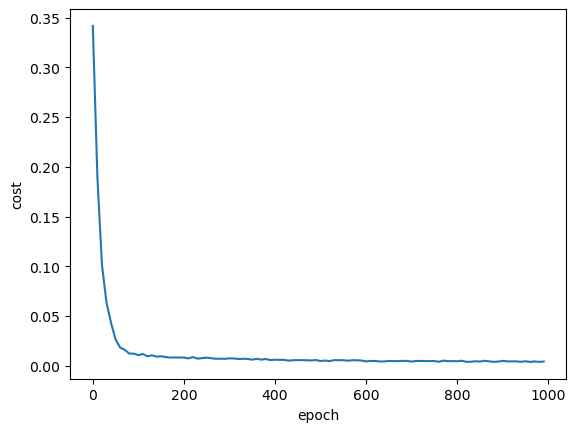

In [81]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_lst_mini,cost_lst_mini)